# Visualização de Dados Bonita e Informativa

### Usando ggplot2 para comunicar seus resultados

> #### **Arquivos**
>  
>  Os arquivos que você precisa para concluir este tutorial podem ser baixados aqui: https://github.com/ourcodingclub/CC-4-Datavis

## **1. Boa visualização de dados e sintaxe ggplot2**

 Escrever o código para o seu gráfico é como construir uma frase composta de diferentes partes que logicamente seguem umas das outras. De uma forma mais visual, significa adicionar camadas que cuidam de diferentes elementos da trama. Seu fluxo de trabalho de plotagem será, portanto, algo como criar um gráfico vazio, adicionar uma camada com seus pontos de dados, depois sua medida de incerteza, os rótulos de eixo e assim por diante.

## **2. Decida o tipo certo de parcela**

Uma parte muito importante de fazer qualquer visualização de dados é certificar-se de que eles são apropriados ao seu tipo de dados (por exemplo, discreto vs contínuo), e se encaixa no seu propósito, ou seja, o que você está tentando comunicar!

## **3. Fazendo parcelas diferentes com ggplot2**

In [1]:
# instalando pacotes
install.packages(c("tidyr", "dplyr", "ggplot2", "readr", "gridExtra"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(tidyr)
library(dplyr)
library(ggplot2)
library(readr)
library(gridExtra)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




Usaremos os dados do Living Planet Index, que você já baixou do repositório do Github

In [4]:
# Importar dados do Índice Planeta Vivo - tendências populacionais de espécies de vertebrados de 1970 a 2014
LPI <- read.csv("/content/LPIdata_CC.csv")

Os dados estão em formato amplo - os diferentes anos são nomes de coluna, quando na verdade deveriam ser linhas na mesma coluna.

In [5]:
# Remodele os dados em formato longo
# Ao somar 9:53, selecionamos as colunas 9 a 53, aquelas referentes aos diferentes anos de monitoramento
LPI2 <- gather(LPI, "year", "abundance", 9:53)
View(LPI2)

Class,Order,Common.Name,Country.list,Region,system,biome,realm,year,abundance
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Aves,Charadriiformes,Slender-billed gull,France,Europe,Freshwater,Temperate coastal rivers,Palearctic,X1970,0
Actinopterygii,Cypriniformes,Rednose labeo,Zimbabwe,Africa,Freshwater,Tropical and subtropical floodplain rivers and wetland complexes,Afrotropical,X1970,0
Actinopterygii,Cypriniformes,Rednose labeo,Zimbabwe,Africa,Freshwater,Tropical and subtropical floodplain rivers and wetland complexes,Afrotropical,X1970,0
Actinopterygii,Siluriformes,Plain squeaker,Zimbabwe,Africa,Freshwater,Tropical and subtropical floodplain rivers and wetland complexes,Afrotropical,X1970,0
Mammalia,Carnivora,Grey seal,United Kingdom,Europe,Marine,Unknown,Atlantic north temperate,X1970,0
Mammalia,Carnivora,Grey seal,United Kingdom,Europe,Marine,Unknown,Atlantic north temperate,X1970,0
Mammalia,Carnivora,Grey seal,United Kingdom,Europe,Marine,Unknown,Atlantic north temperate,X1970,0
Mammalia,Carnivora,Grey seal,United Kingdom,Europe,Marine,Unknown,Atlantic north temperate,X1970,0
Mammalia,Carnivora,Grey seal,United Kingdom,Europe,Marine,Unknown,Atlantic north temperate,X1970,0


Há um 'X' na frente de todos os anos porque quando importamos os dados, todos os nomes de coluna se tornaram caracteres. (A maneira é R de transformar números em caracteres.) Agora que os anos são linhas, não colunas, precisamos que sejam números adequados.

In [6]:
LPI2$year <- parse_number(LPI2$year)

# Ao manipular dados é sempre bom verificar se as variáveis ​​ficaram como queremos
# Use a função str()
str(LPI2)

'data.frame':	748080 obs. of  10 variables:
 $ Class       : chr  "Aves" "Actinopterygii" "Actinopterygii" "Actinopterygii" ...
 $ Order       : chr  "Charadriiformes" "Cypriniformes" "Cypriniformes" "Siluriformes" ...
 $ Common.Name : chr  "Slender-billed gull" "Rednose labeo" "Rednose labeo" "Plain squeaker" ...
 $ Country.list: chr  "France" "Zimbabwe" "Zimbabwe" "Zimbabwe" ...
 $ Region      : chr  "Europe" "Africa" "Africa" "Africa" ...
 $ system      : chr  "Freshwater" "Freshwater" "Freshwater" "Freshwater" ...
 $ biome       : chr  "Temperate coastal rivers" "Tropical and subtropical floodplain rivers and wetland complexes" "Tropical and subtropical floodplain rivers and wetland complexes" "Tropical and subtropical floodplain rivers and wetland complexes" ...
 $ realm       : chr  "Palearctic" "Afrotropical" "Afrotropical" "Afrotropical" ...
 $ year        : num  1970 1970 1970 1970 1970 1970 1970 1970 1970 1970 ...
 $ abundance   : chr  "0" "0" "0" "0" ...


In [7]:
# Abundância também é uma variável de caractere, quando deveria ser numérica, vamos consertar isso
LPI2$abundance <- as.numeric(LPI2$abundance)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


Este é um conjunto de dados muito grande, então para os primeiros gráficos vamos nos concentrar em como a população de apenas uma espécie. Escolha uma espécie de sua escolha e certifique-se de soletrar o nome exatamente como ele é inserido no dataframe.

In [8]:
unique(LPI2$Common.Name)

[1] "Slender-billed gull"                                                         
   [2] "Rednose labeo"                                                               
   [3] "Plain squeaker"                                                              
   [4] "Grey seal"                                                                   
   [5] "Gull-billed tern"                                                            
   [6] "Black-headed gull / Common black-headed gull"                                
   [7] "Mew gull"                                                                    
   [8] "Sandwich tern"                                                               
   [9] "Lesser black-backed gull"                                                    
  [10] "White-tailed eagle"                                                          
  [11] "Northern gannet"                                                             
  [12] "Peregrine falcon"                                                            
  [13] "Wild turkey"                                                                 
  [14] "Rusty blackbird"                                                             
  [15] "House finch"                                                                 
  [16] "Common pintail / Northern pintail"                                           
  [17] "Bonaparte's gull"                                                            
  [18] "Sea otter"                                                                   
  [19] "Hazel grouse"                                                                
  [20] "Grey wolf / Gray wolf"                                                       
  [21] "Eurasian lynx"                                                               
  [22] "Western marsh harrier"                                                       
  [23] "White-headed duck"                                                           
  [24] "Greylag goose"                                                               
  [25] "Mediterranean gull"                                                          
  [26] "Cattle egret"                                                                
  [27] "Eurasian spoonbill"                                                          
  [28] "Greater flamingo"                                                            
  [29] "Great white egret"                                                           
  [30] "Glossy ibis"                                                                 
  [31] "Common crane"                                                                
  [32] "Great cormorant / Cormorant"                                                 
  [33] "Eurasian sparrowhawk / Northern sparrowhawk"                                 
  [34] "Lesser spotted woodpecker"                                                   
  [35] "Grey partridge"                                                              
  [36] "Mute swan"                                                                   
  [37] "Mink / American mink"                                                        
  [38] "Horned grebe"                                                                
  [39] "Tufted titmouse"                                                             
  [40] "Short-eared owl"                                                             
  [41] "Mourning dove"                                                               
  [42] "Black-billed magpie / Eurasian magpie"                                       
  [43] "Boreal chickadee"                                                            
  [44] "Northern cardinal"                                                           
  [45] "Greater yellowlegs"                                                          
  [46] "Bald eagle"                                                                  
  [47] "White-breasted nuthatch"               

Agora, filtre apenas os registros dessa espécie, substituindo o nome da espécie escolhida

In [40]:
vulture <- filter(LPI2, Common.Name == "Griffon vulture / Eurasian griffon")
head(vulture)

,Class,Order,Common.Name,Country.list,Region,system,biome,realm,year,abundance
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,Aves,Falconiformes,Griffon vulture / Eurasian griffon,Croatia,Europe,Terrestrial,Temperate broadleaf and mixed forests,Palearctic,1970,NA
2,Aves,Falconiformes,Griffon vulture / Eurasian griffon,Croatia,Europe,Terrestrial,Temperate broadleaf and mixed forests,Palearctic,1970,NA
3,Aves,Falconiformes,Griffon vulture / Eurasian griffon,Serbia,Europe,Terrestrial,Temperate broadleaf and mixed forests,Palearctic,1970,NA
4,Aves,Falconiformes,Griffon vulture / Eurasian griffon,Serbia,Europe,Terrestrial,Temperate broadleaf and mixed forests,Palearctic,1970,NA
5,Aves,Falconiformes,Griffon vulture / Eurasian griffon,Serbia,Europe,Terrestrial,Temperate broadleaf and mixed forests,Palearctic,1970,NA
6,Aves,Falconiformes,Griffon vulture / Eurasian griffon,Spain,Europe,Terrestrial,Temperate broadleaf and mixed forests,Palearctic,1970,NA


In [41]:
# Existem muitos NAs neste dataframe, então vamos nos livrar das linhas vazias usando na.omit()
vulture <- na.omit(vulture)

## **3. Histogramas para visualizar a distribuição de dados**

Faremos uma comparação rápida entre gráficos.

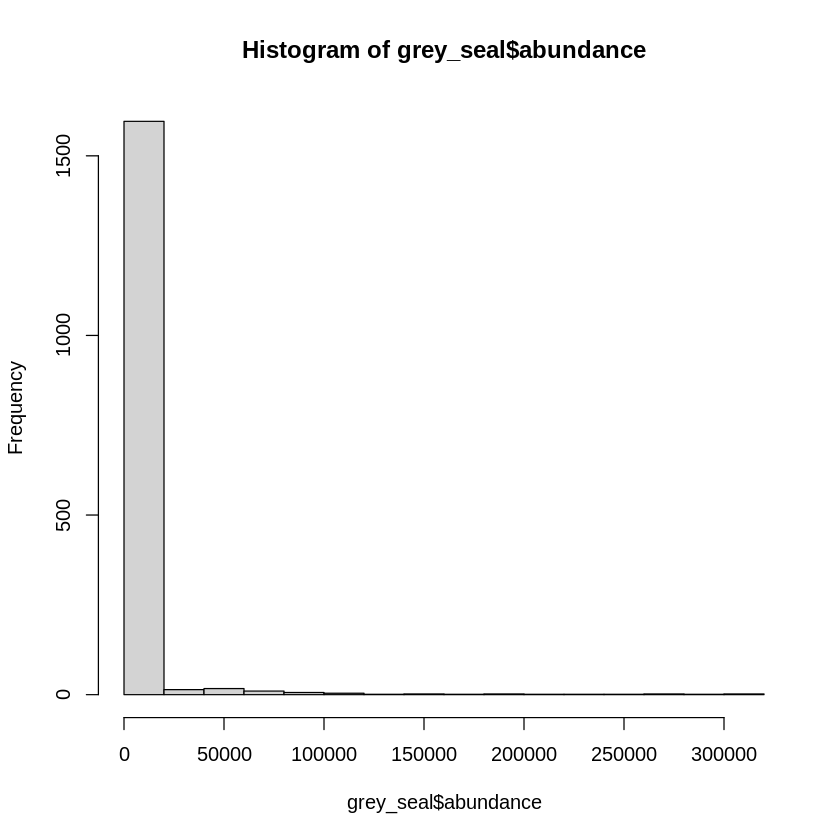

In [21]:
# Com gráficos base R
base_seal <- hist(grey_seal$abundance)

Para fazer o mesmo com ggplot, precisamos especificar o tipo de gráfico usando **geom_histogram()**.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


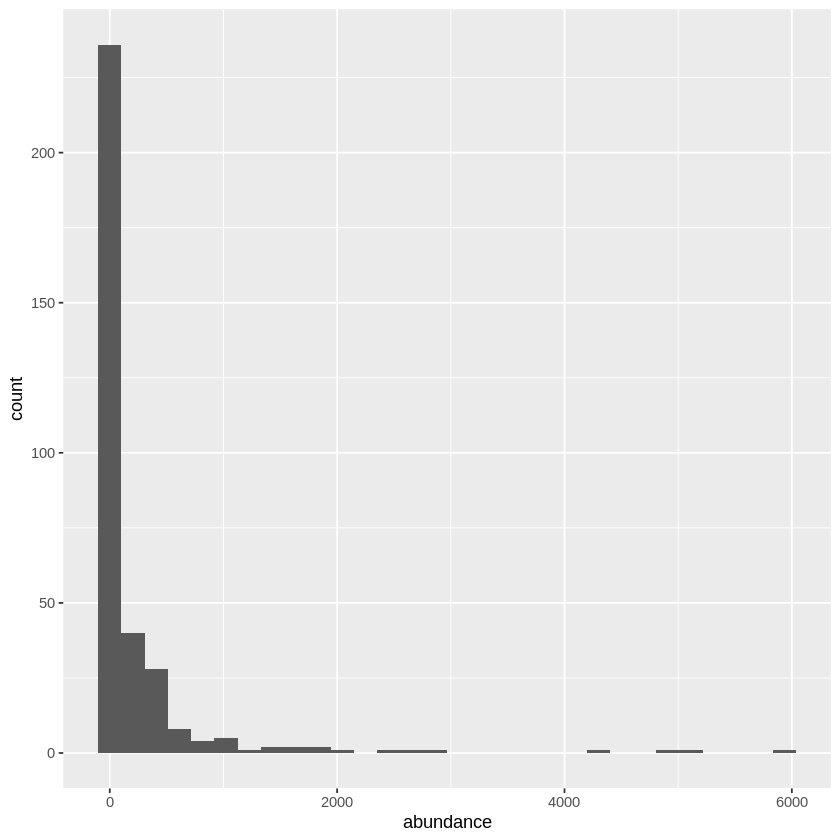

In [42]:
(vulture_hist <- ggplot(vulture, aes(x = abundance))  +
  geom_histogram())


# Para outra maneira de verificar se seus dados estão normalmente distribuídos,
# você pode criar gráficos de densidade usando o pacote ggpubr e o comando ggdensity(),
# ou usar as funções qqnorm() e qqline()

As configurações padrão de **ggplot** não são ideais: há muito espaço cinza desnecessário atrás do histograma, os rótulos de eixo são muito pequenos e as barras se misturam entre si. Vamos embelezar um pouco o histograma! É aqui que o verdadeiro poder de **ggplot2** brilha.

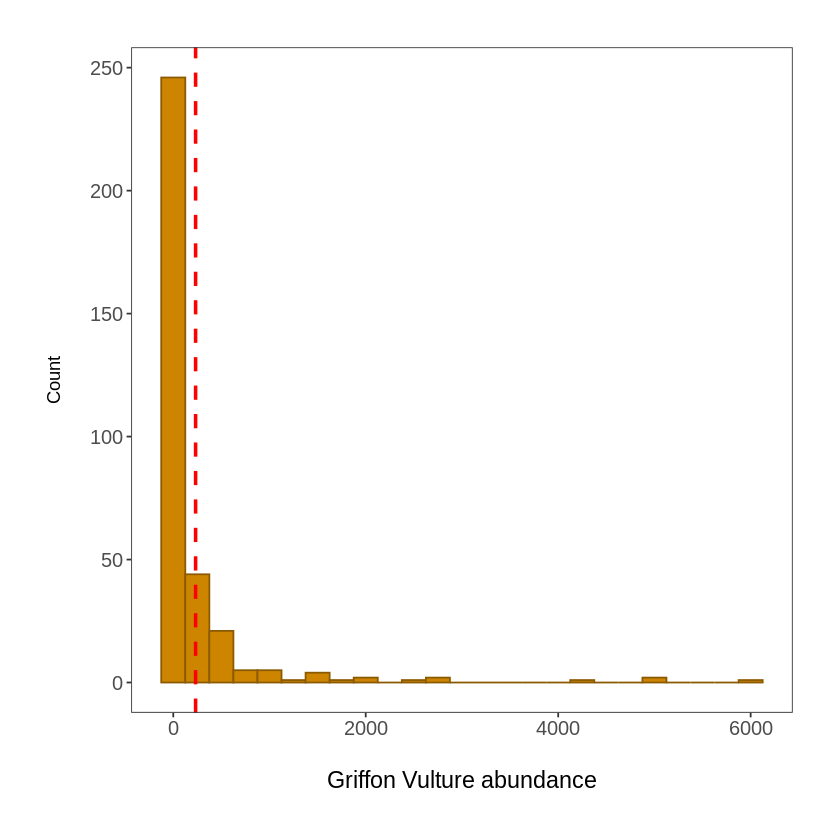

In [43]:
(vulture_hist <- ggplot(vulture, aes(x = abundance)) +
  # Alterando a largura do compartimento e as cores
  geom_histogram(binwidth = 250, colour = "#8B5A00", fill = "#CD8500") +
  # Adicionando uma linha para abundância média
  geom_vline(aes(xintercept = mean(abundance)),
    # Mudando a aparência da linha
    colour = "red", linetype = "dashed", size=1) +
  # Mudando o tema para se livrar do fundo cinza
  theme_bw() +
  # Alterando o texto do rótulo do eixo y
  ylab("Count\n") +
  # \n adiciona uma linha em branco entre o eixo e o texto
  xlab("\nGriffon Vulture abundance") +
  # Alterando o tamanho da fonte dos rótulos e títulos dos eixos
  theme(axis.text = element_text(size = 12),
    # face="plain" é o padrão, você pode alterá-lo para itálico, negrito, etc.
    axis.title.x = element_text(size = 14, face = "plain"),
    # Removendo as linhas cinza da grade
    panel.grid = element_blank(),
    # Colocando uma margem de 1 cm ao redor da plotagem
    plot.margin = unit(c(1,1,1,1), units = , "cm"))
  )

  Podemos ver no histograma que os dados estão muito distorcidos - uma distribuição típica de dados de abundância de contagem


## **3b. Gráfico de dispersão para examinar a mudança populacional ao longo do tempo**

Digamos que estamos interessados em como as populações de grifos mudaram entre 1970 e 2017 na Croácia e na Itália.

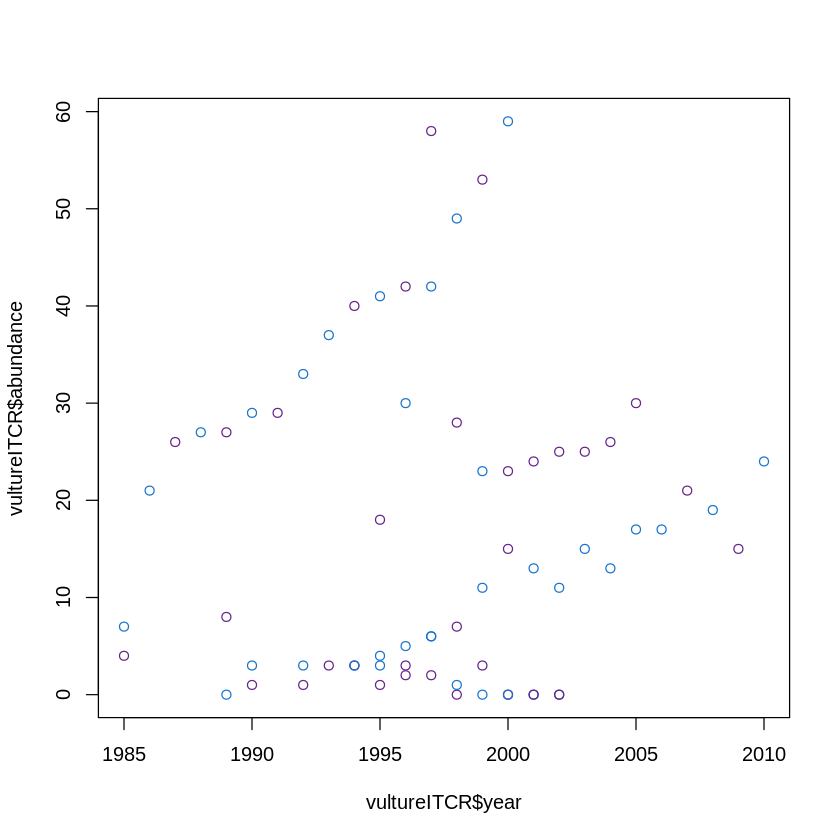

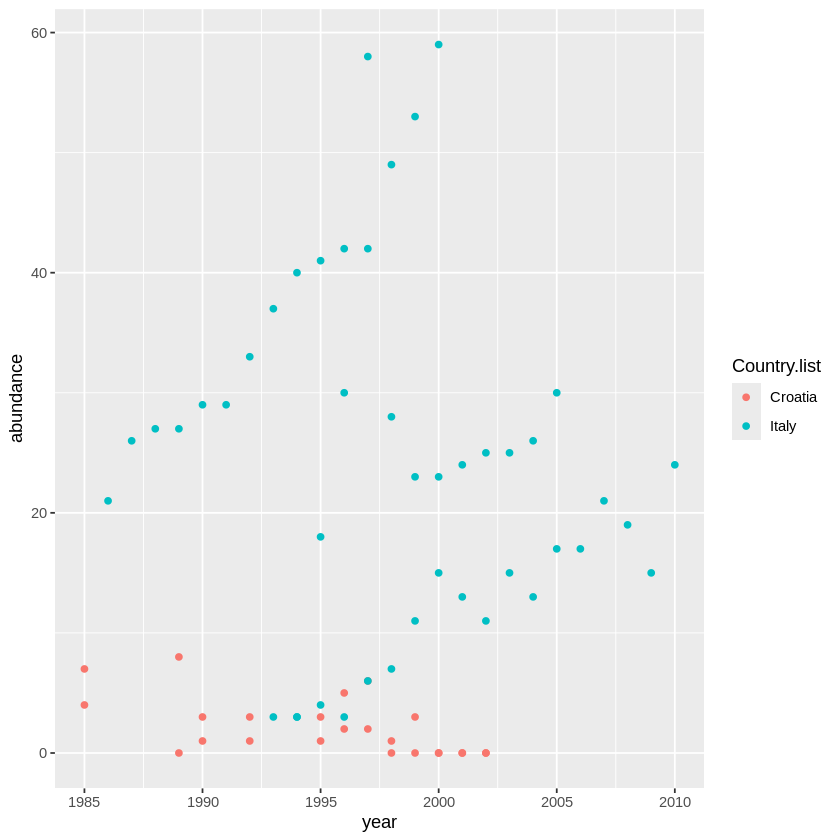

In [45]:
# Filtrando os dados para obter registros apenas da Croácia e Itália usando a função `filter()` do pacote `dplyr`
vultureITCR <- filter(vulture, Country.list %in% c("Croatia", "Italy"))

# Usando gráficos base padrão
plot(vultureITCR$year, vultureITCR$abundance, col = c("#1874CD", "#68228B"))

# Usando gráficos padrão do ggplot2
# vincular a cor a um fator dentro de aes() garante que a cor dos pontos irá variar de acordo com os níveis do fator
(vulture_scatter <- ggplot(vultureITCR, aes(x = year, y = abundance, colour = Country.list)) +
    geom_point())

Warning message:
“A numeric `legend.position` argument in `theme()` was deprecated in ggplot2
3.5.0.
ℹ Please use the `legend.position.inside` argument of `theme()` instead.”
`geom_smooth()` using formula = 'y ~ x'


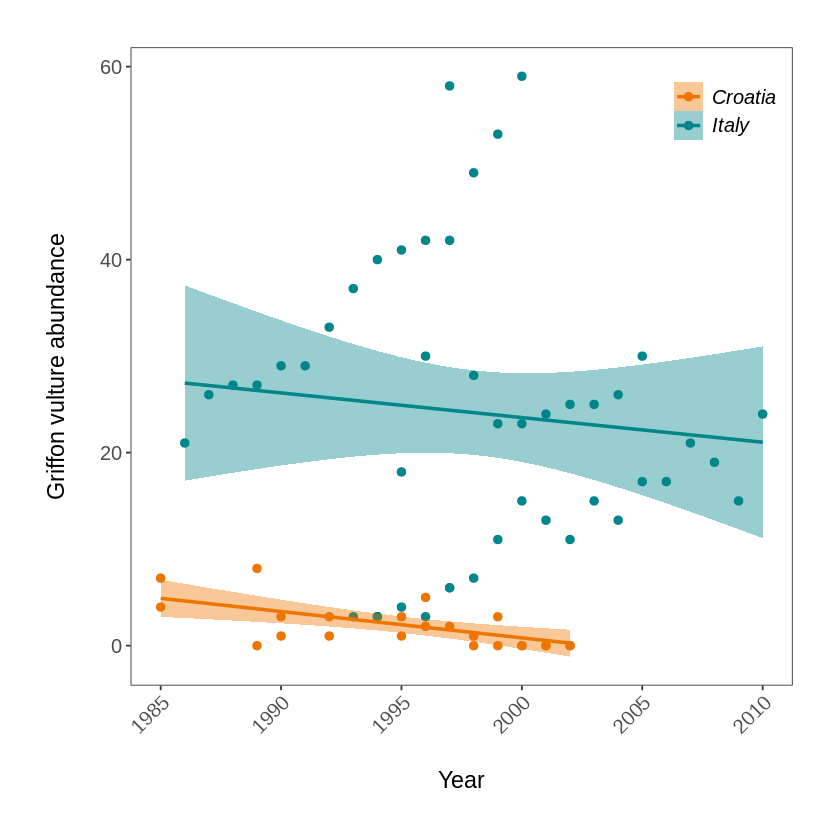

In [46]:
(vulture_scatter <- ggplot(vultureITCR, aes (x = year, y = abundance, colour = Country.list)) +
    # Alterando o tamanho do ponto
    geom_point(size = 2) +
    # Adicionando ajuste de modelo linear, código de cores por país
    geom_smooth(method = "lm", aes(fill = Country.list)) +
    theme_bw() +
    # Adicionando cores personalizadas para geoms sólidos (fita)
    scale_fill_manual(values = c("#EE7600", "#00868B")) +
    # Adicionando cores personalizadas para linhas e pontos
    scale_colour_manual(values = c("#EE7600", "#00868B"),
                        labels = c("Croatia", "Italy")) +
    # Adicionando rótulos para a legenda
    ylab("Griffon vulture abundance\n") +
    xlab("\nYear")  +
    # tornando os anos um pouco inclinados
    theme(axis.text.x = element_text(size = 12, angle = 45, vjust = 1, hjust = 1),
          axis.text.y = element_text(size = 12),
          axis.title = element_text(size = 14, face = "plain"),
          # Removendo as linhas da grade de fundo
          panel.grid = element_blank(),
          # Adicionando uma margem de 1 cm ao redor do gráfico
          plot.margin = unit(c(1,1,1,1), units = , "cm"),
          # Definindo a fonte do texto da legenda
          legend.text = element_text(size = 12, face = "italic"),
          # Removendo o título da legenda
          legend.title = element_blank(),
          # Configurando a posição da legenda - 0 é esquerda/inferior, 1 é superior/direita
          legend.position = c(0.9, 0.9)))

*Tendências populacionais do grifo na Croácia e Itália. Os pontos de dados representam dados brutos com um ajuste de modelo linear e intervalos de confiança de 95%. A abundância é medida em número de indivíduos reprodutores.*

## **3c. Boxplot para examinar se a abundância de abutres difere entre Croácia e Itália**

Os gráficos de caixa são muito informativos, pois mostram a mediana e a dispersão de seus dados e permitem que você compare rapidamente os valores entre os grupos. Se algumas caixas não se sobrepõem umas às outras, você provavelmente tem diferenças significativas, e vale a pena investigar mais com testes estatísticos.

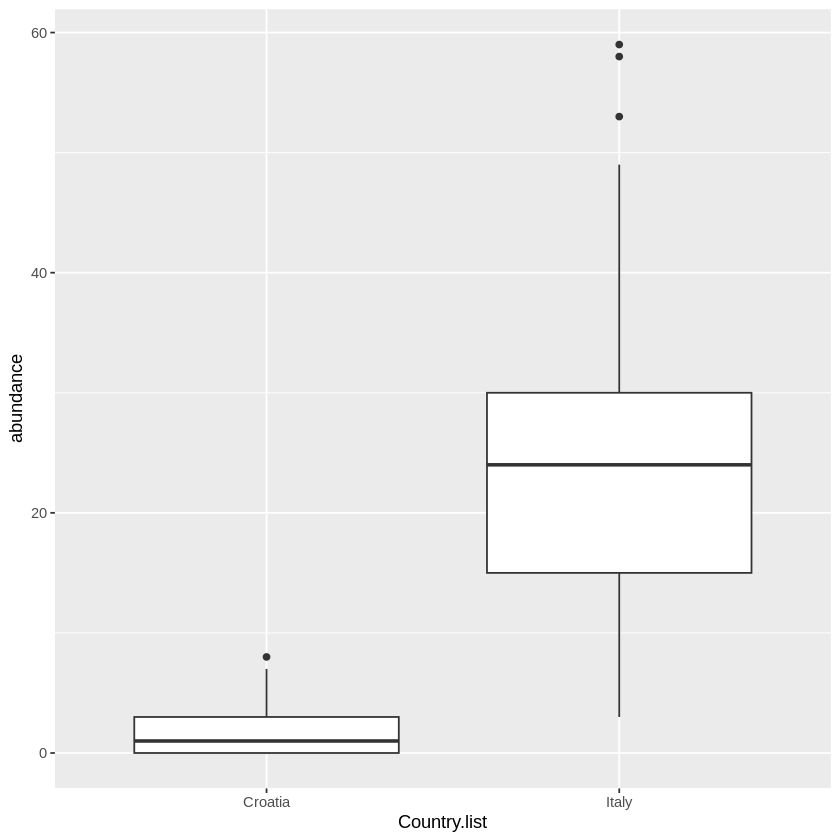

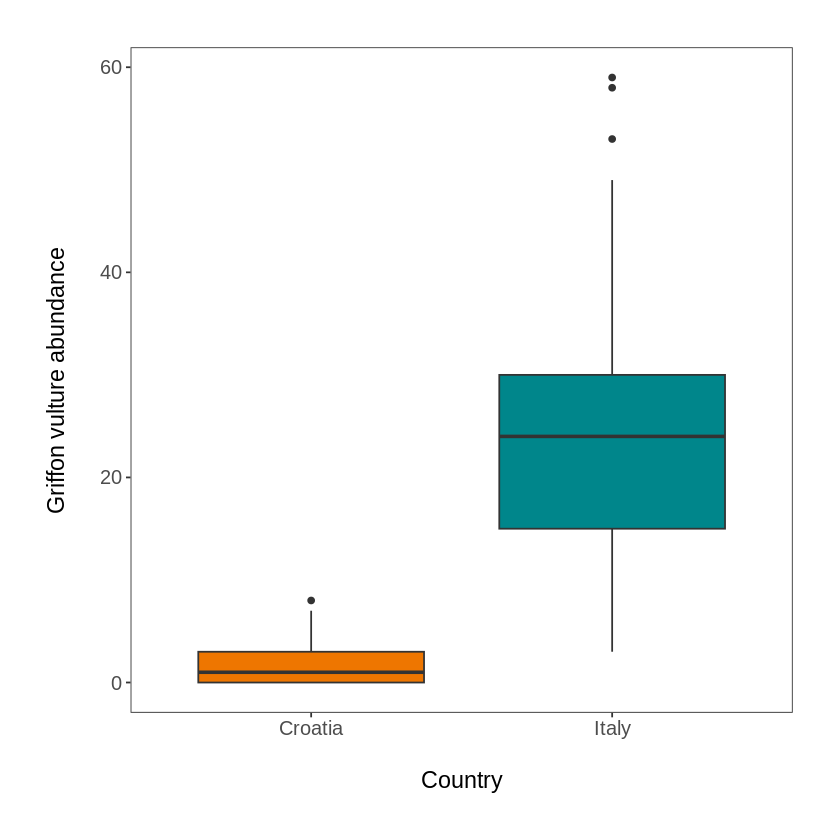

In [49]:
# Base
(vulture_boxplot <- ggplot(vultureITCR, aes(Country.list, abundance)) + geom_boxplot())

# Embelezador

(vulture_boxplot <- ggplot(vultureITCR, aes(Country.list, abundance)) +
    geom_boxplot(aes(fill = Country.list)) +
    theme_bw() +
    # Adicionando cores personalizadas
    scale_fill_manual(values = c("#EE7600", "#00868B")) +
    # Adicionando cores personalizadas
    scale_colour_manual(values = c("#EE7600", "#00868B")) +
    ylab("Griffon vulture abundance\n") +
    xlab("\nCountry")  +
    theme(axis.text = element_text(size = 12),
          axis.title = element_text(size = 14, face = "plain"),
          # Removendo as linhas da grade de fundo
          panel.grid = element_blank(),
          # Adicionando uma margem
          plot.margin = unit(c(1,1,1,1), units = , "cm"),
          # Removendo legenda - não é necessário com apenas 2 fatores
          legend.position = "none"))

## **3d. Barplot para comparar a riqueza de espécies de alguns países europeus**

Vamos agora calcular quantas espécies são encontradas no conjunto de dados do LPI para alguns países europeus e traçar a riqueza de espécies.

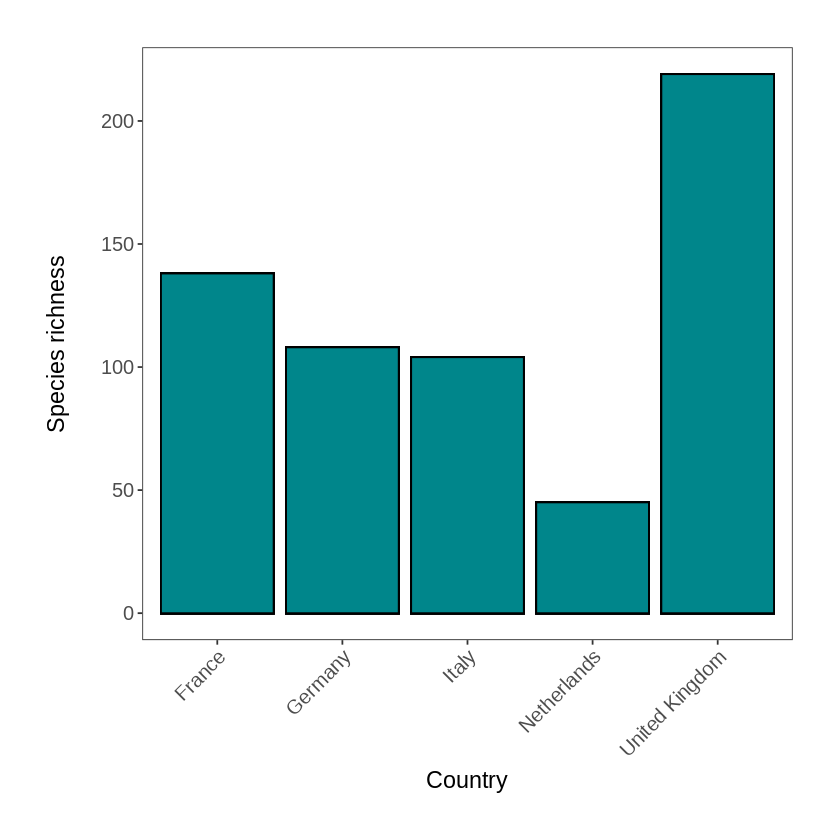

In [50]:
# Calculando a riqueza de espécies usando pipes %>% do pacote dplyr
richness <- LPI2 %>% filter (Country.list %in% c("United Kingdom", "Germany", "France", "Netherlands", "Italy")) %>%
            group_by(Country.list) %>%
            # cria uma nova coluna com base em quantos nomes comuns (ou espécies) exclusivos existem em cada país
            mutate(richness = (length(unique(Common.Name))))

# Traçando a riqueza de espécies
(richness_barplot <- ggplot(richness, aes(x = Country.list, y = richness)) +
    geom_bar(position = position_dodge(), stat = "identity", colour = "black", fill = "#00868B") +
    theme_bw() +
    ylab("Species richness\n") +
    xlab("Country")  +
    # Etiquetas angulares, para que o texto não se sobreponha
    theme(axis.text.x = element_text(size = 12, angle = 45, vjust = 1, hjust = 1),
          axis.text.y = element_text(size = 12),
          axis.title = element_text(size = 14, face = "plain"),
          panel.grid = element_blank(),
          plot.margin = unit(c(1,1,1,1), units = , "cm")))

*Riqueza de espécies em cinco países europeus (com base em dados do LPI).*

## **4. Usando facetas e criando painéis**

Às vezes, exibir todos os dados em um gráfico o torna muito confuso. Se quiséssemos examinar a mudança populacional dos abutres em todos os países, em vez de Itália e Croácia, teríamos 10 populações no mesmo gráfico. Ao adicionar uma camada facetante, podemos dividir os dados em várias facetas representando os diferentes países. Isso é feito usando o **facet_wrap()**.

`geom_smooth()` using formula = 'y ~ x'


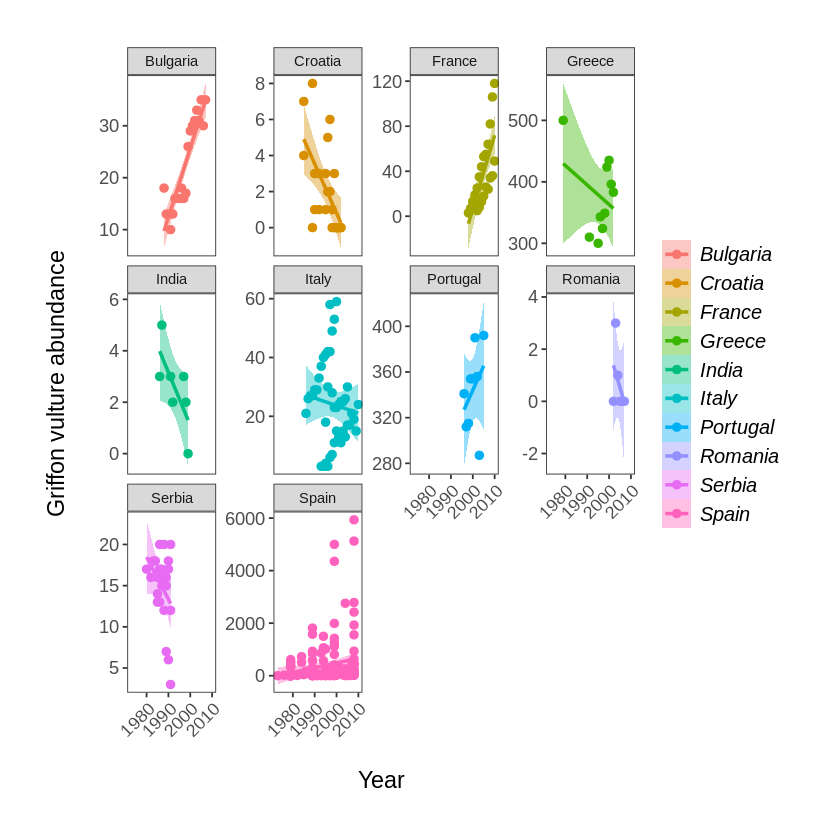

In [53]:
# Trace a mudança populacional para os países individualmente
(vulture_scatter_facets <- ggplot(vulture, aes (x = year, y = abundance, colour = Country.list)) +
      # Alterando o tamanho do ponto
      geom_point(size = 2) +
      # Adicionando ajuste de modelo linear, código de cores por país
      geom_smooth(method = "lm", aes(fill = Country.list)) +
      # ESTA LINHA CRIA A FACETAÇÃO
      facet_wrap(~ Country.list, scales = "free_y") +
      theme_bw() +
      ylab("Griffon vulture abundance\n") +
      xlab("\nYear")  +
      # tornando os anos um pouco inclinados
      theme(axis.text.x = element_text(size = 11, angle = 45, vjust = 1, hjust = 1),
            axis.text.y = element_text(size = 11),
            axis.title = element_text(size = 14, face = "plain"),
            # Removendo as linhas da grade de fundo
            panel.grid = element_blank(),
            # Adicionando uma margem de 1 cm ao redor do gráfico
            plot.margin = unit(c(1,1,1,1), units = , "cm"),
            # Definindo a fonte do texto da legenda
            legend.text = element_text(size = 12, face = "italic"),
            # Removendo o título da legenda
            legend.title = element_blank(),
            legend.position = "right"))


*Mudança populacional do grifo-abutre em todo o mundo, a partir do conjunto de dados LPI.*

E, finalmente, às vezes você quer organizar várias figuras juntas para criar um painel.

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


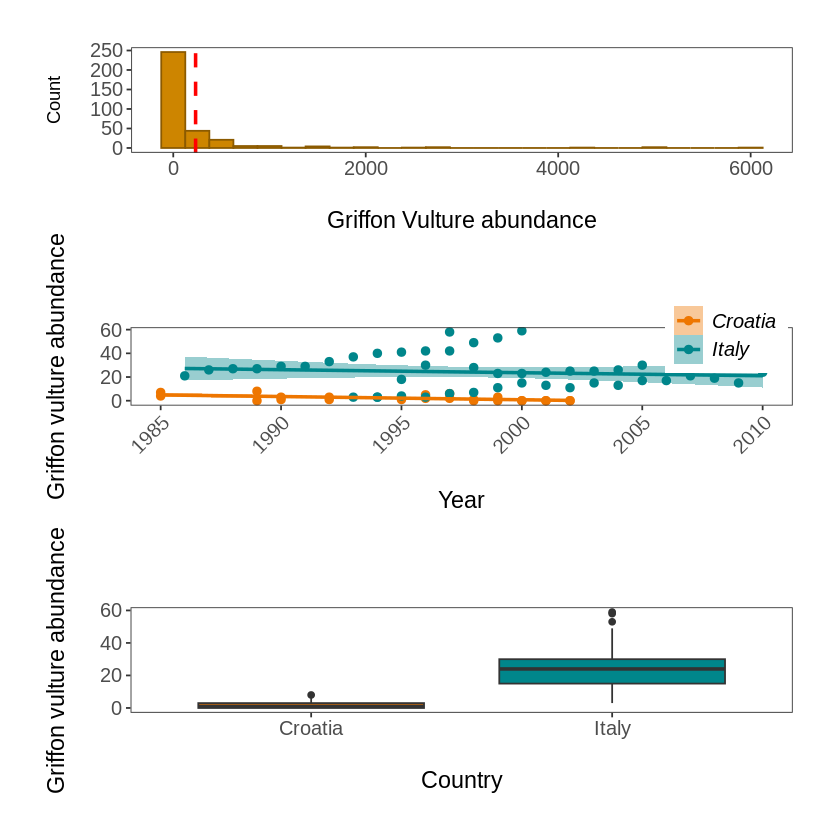

TableGrob (3 x 1) "arrange": 3 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (2-2,1-1) arrange gtable[layout]
3 3 (3-3,1-1) arrange gtable[layout]

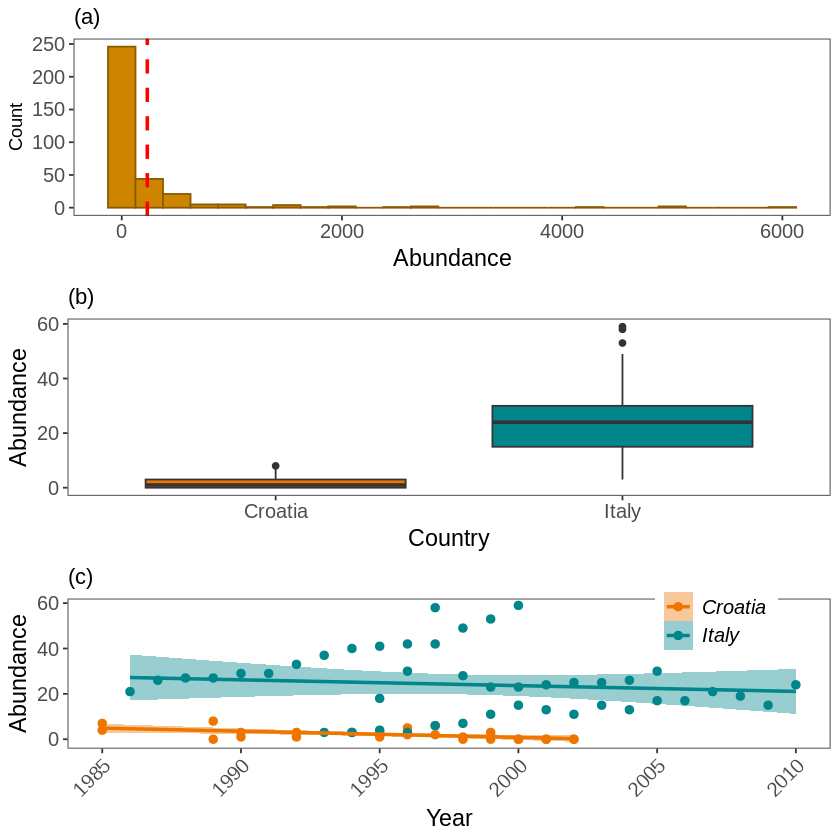

In [54]:
grid.arrange(vulture_hist, vulture_scatter, vulture_boxplot, ncol = 1)

# Isso não parece certo - os gráficos estão muito esticados, a legenda e o texto estão todos bagunçados, as margens brancas são muito grandes

# Corrigindo os problemas - adicionar ylab() novamente substitui as configurações anteriores

(panel <- grid.arrange(
      # adicionando rótulos aos diferentes gráficos
      vulture_hist + ggtitle("(a)") + ylab("Count") + xlab("Abundance") +
      theme(plot.margin = unit(c(0.2, 0.2, 0.2, 0.2), units = , "cm")),

      vulture_boxplot + ggtitle("(b)") + ylab("Abundance") + xlab("Country") +
      theme(plot.margin = unit(c(0.2, 0.2, 0.2, 0.2), units = , "cm")),

      vulture_scatter + ggtitle("(c)") + ylab("Abundance") + xlab("Year") +
      theme(plot.margin = unit(c(0.2, 0.2, 0.2, 0.2), units = , "cm")) +
      theme(legend.text = element_text(size = 12, face = "italic"),
            legend.title = element_blank(),
            # alterando a posição da legenda para que ela caiba no painel
            legend.position = c(0.85, 0.85)),

      ncol = 1)) # ncol determina quantas colunas você tem

*Examinando populações de grifos a partir do conjunto de dados do LPI. (a) mostra histograma da distribuição de dados de abundância, (b) mostra uma comparação boxplot da abundância na Croácia e Itália, e (c) mostra tendências populacionais entre 1970 e 2014 na Croácia e Itália.*